In [35]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score,confusion_matrix,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

#### Importando o dataset

In [36]:
df_import = pd.read_csv('sao-paulo-properties-april-2019.csv')
df_import.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [37]:
# Separando a base em treino e teste
df = df_import.copy()

X = df.drop(columns=['Price']) 
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df = X_train
df['Price'] = y_train

df_test = X_test.copy()
df_test['Price'] = y_test



# Descrição sucinta do problema e da base de dados

##  Qual o problema a ser resolvido?

### O problema a ser resolvido trata-se da previsão de custo do alguel ou venda de imóveis no estado de São Paulo.

##  O que significa cada instância do dataset?

#### Price: Preço final do imóvel
#### Condo: Despesas do condomínio
#### Size: O tamanho da propriedade em metros quadrados m²
#### Rooms: Número de quartos
#### Toilets: Número de banheiros
#### Suites: Número de quartos com casa de banho privada
#### Parking: Número de vagas no estacionamento
#### Elevator: Valor binário: 1 se houver elevador no edifício, 0 caso contrário
#### Furnished: Valor binário: 1 se a propriedade for mobiliado, 0 caso contrário
#### Swimming Pool: Valor binário: 1 se a propriedade tiver piscina, 0 caso contrário
#### New: Valor binário: 1 se a propriedade for muito recente, 0 caso contrário
#### District: O bairro e a cidade onde o imóvel está localizado, ex.: Itaim Bibi/São Paulo
#### Negotiation Type: Venda ou Aluguel
#### Property Type: 
#### Latitude: O tipo de propriedade
#### Longitude: Localização geográfica


##  Quais são os principais atributos e seus tipos?

In [38]:
#Informaçõesa respeito dos atributos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 6088 to 7270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Condo             9548 non-null   int64  
 1   Size              9548 non-null   int64  
 2   Rooms             9548 non-null   int64  
 3   Toilets           9548 non-null   int64  
 4   Suites            9548 non-null   int64  
 5   Parking           9548 non-null   int64  
 6   Elevator          9548 non-null   int64  
 7   Furnished         9548 non-null   int64  
 8   Swimming Pool     9548 non-null   int64  
 9   New               9548 non-null   int64  
 10  District          9548 non-null   object 
 11  Negotiation Type  9548 non-null   object 
 12  Property Type     9548 non-null   object 
 13  Latitude          9548 non-null   float64
 14  Longitude         9548 non-null   float64
 15  Price             9548 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory u

#### A maioria das features são numéricas, apenas District, Negotiation Type e Property Type são categóricas

#### Além disso, não há valores nulos

### 

# Análise Exploratória de Dados

## Como cada variável se distribui?

In [39]:
# Distribuição geral dos dados
for col in df.columns:
    print(f'-------Distribuição de {col}------')
    print(df[f'{col}'].describe())
    print(df.groupby([f'{col}']).size())
    print('\n')

-------Distribuição de Condo------
count    9548.000000
mean      692.682237
std       756.063125
min         0.000000
25%       290.000000
50%       500.000000
75%       840.000000
max      9500.000000
Name: Condo, dtype: float64
Condo
0       1383
1         19
6          1
10         3
15         1
        ... 
7500       1
7800       1
7928       1
8800       1
9500       1
Length: 1227, dtype: int64


-------Distribuição de Size------
count    9548.000000
mean       84.639925
std        58.786934
min        30.000000
25%        50.000000
50%        65.000000
75%        94.000000
max       880.000000
Name: Size, dtype: float64
Size
30     55
31     22
32     26
33     25
34     37
       ..
598     1
640     1
670     1
852     1
880     1
Length: 318, dtype: int64


-------Distribuição de Rooms------
count    9548.000000
mean        2.318182
std         0.778990
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Rooms, dty

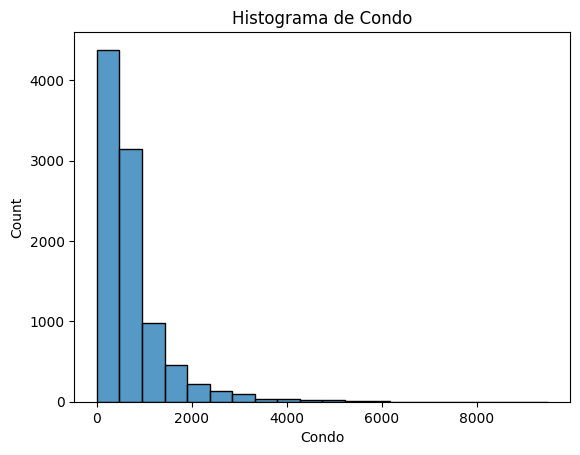

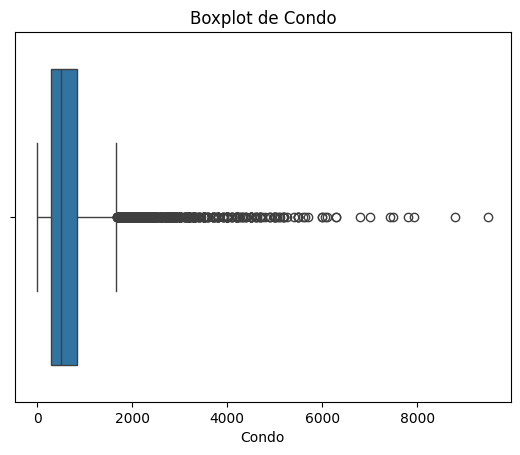

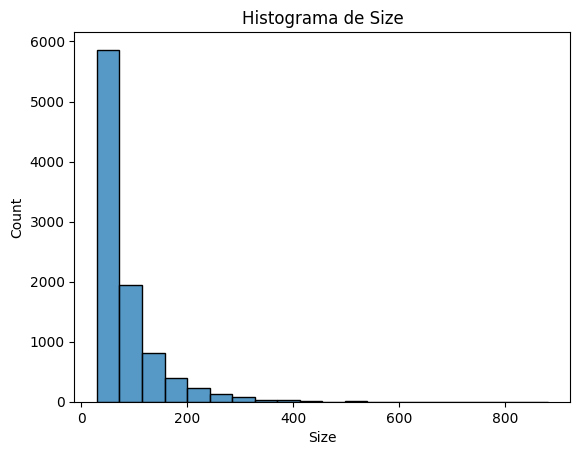

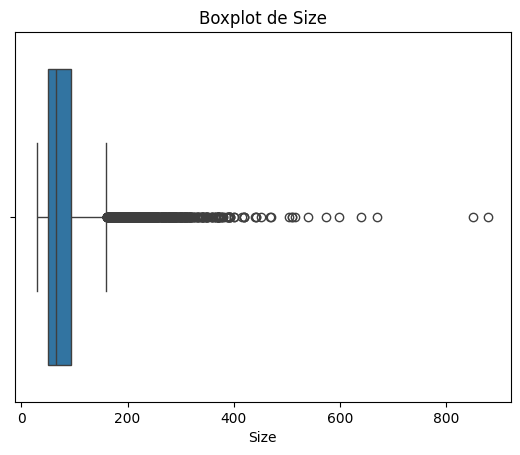

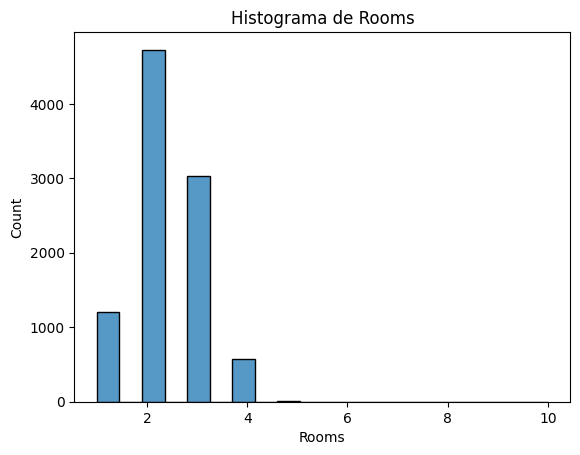

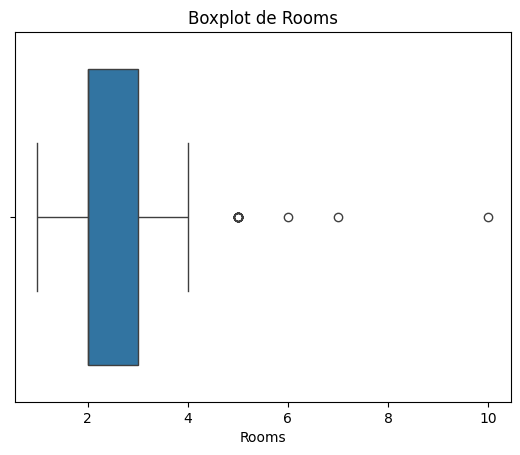

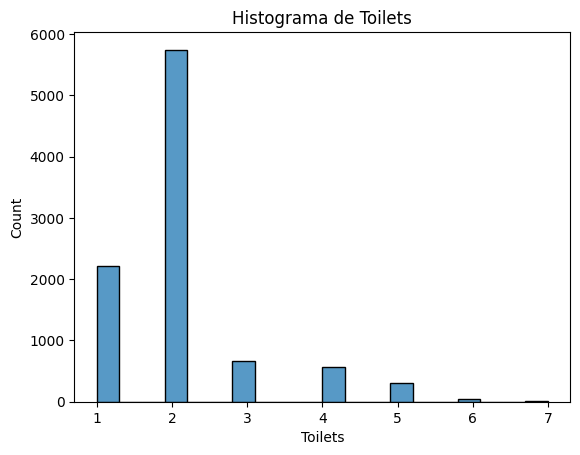

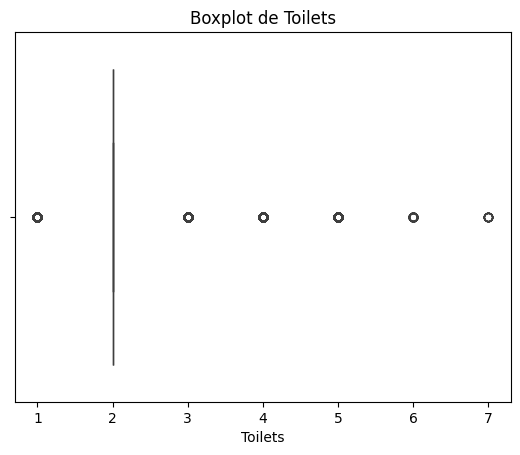

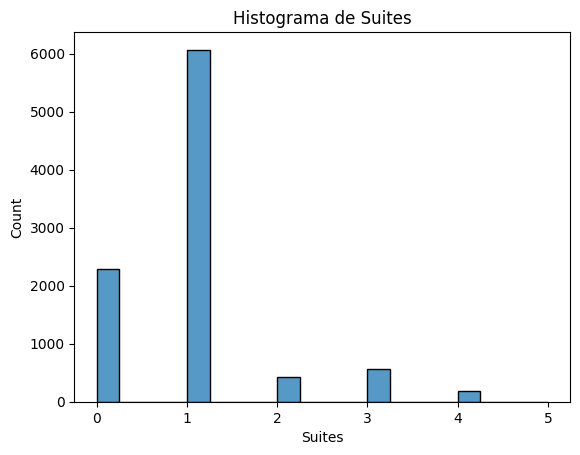

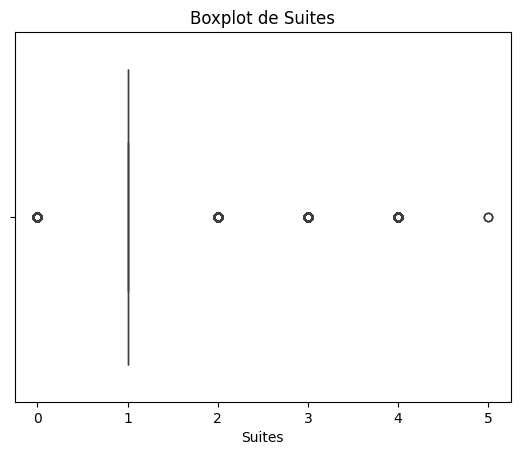

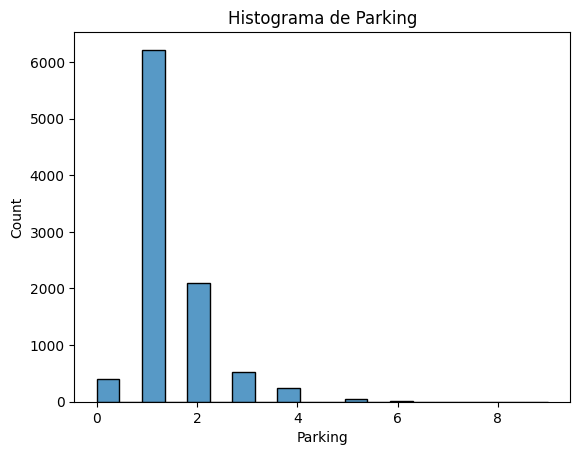

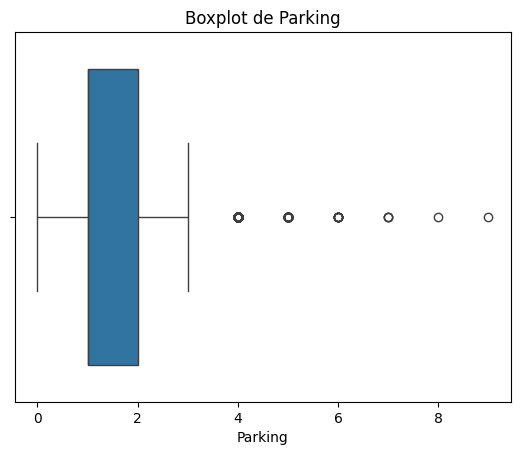

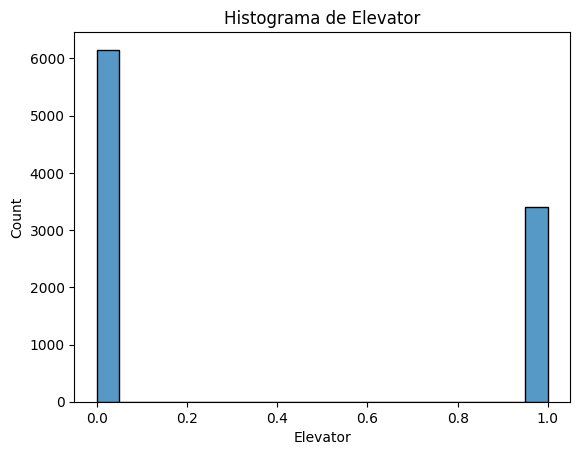

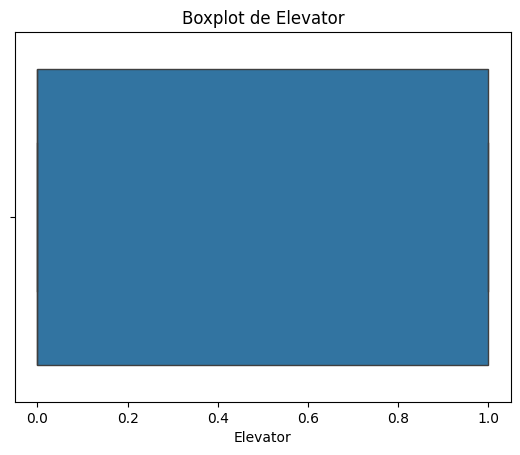

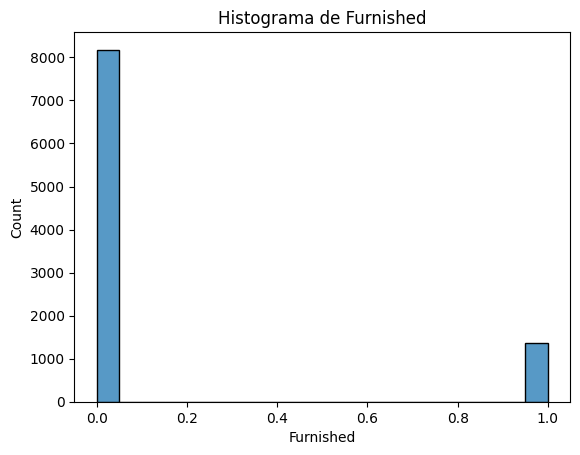

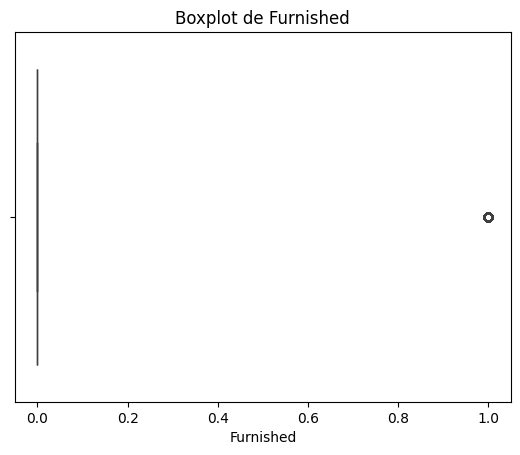

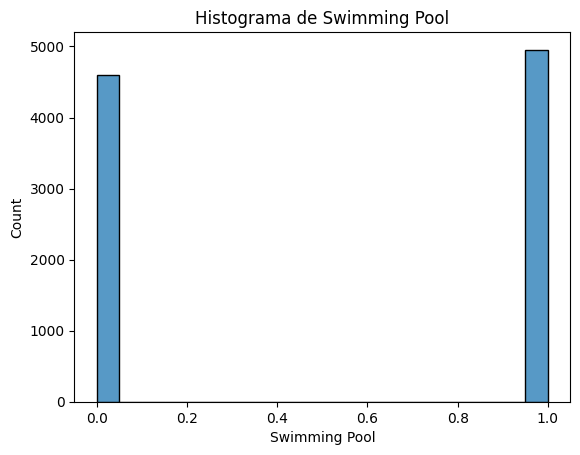

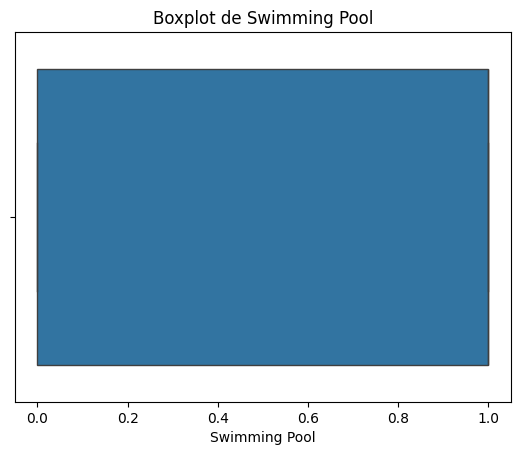

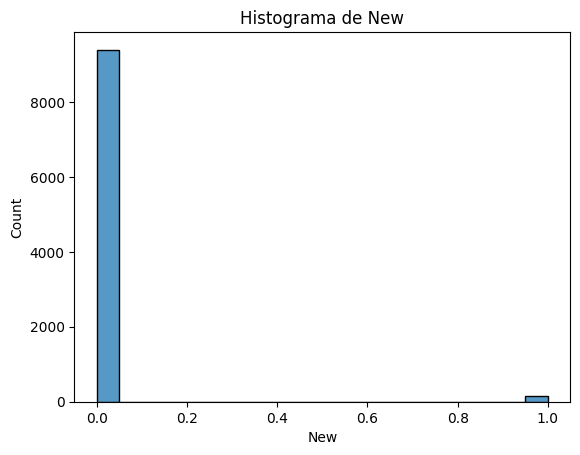

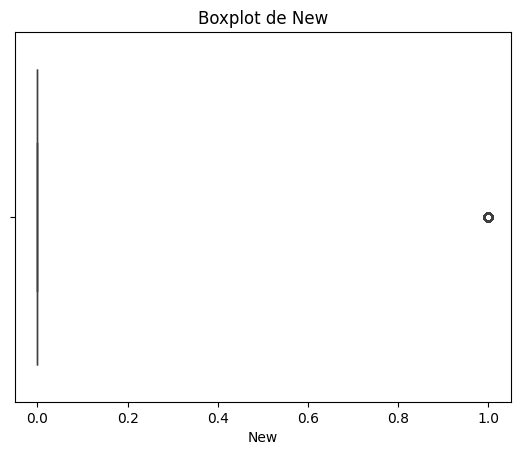

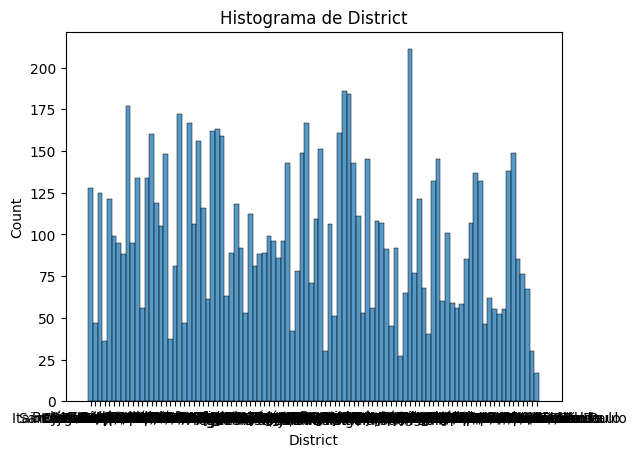

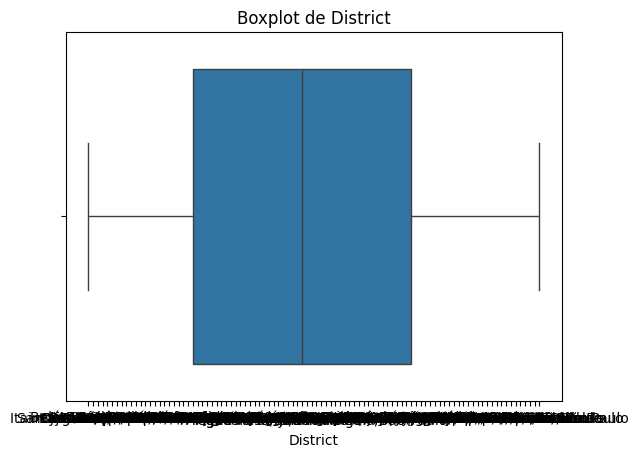

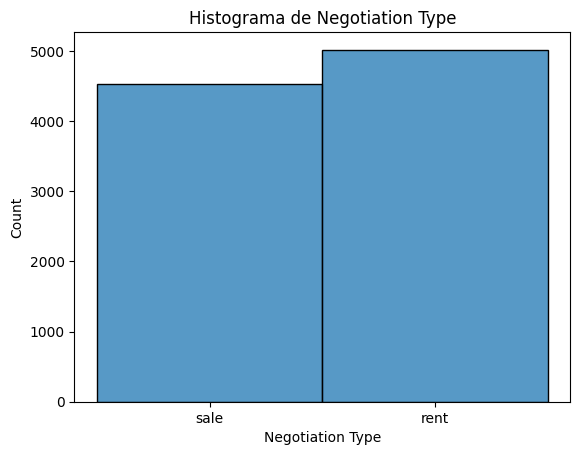

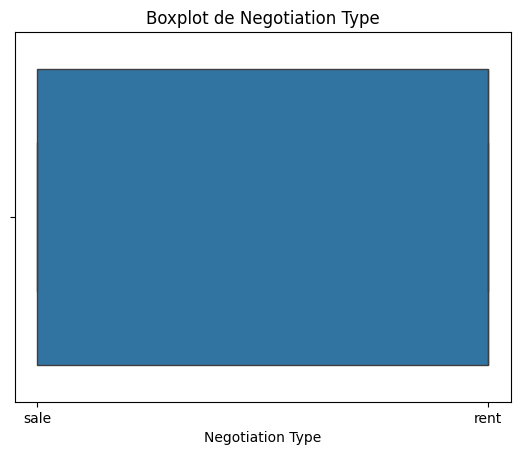

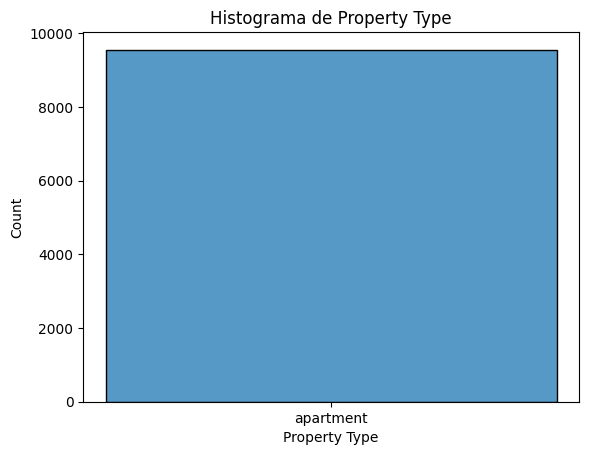

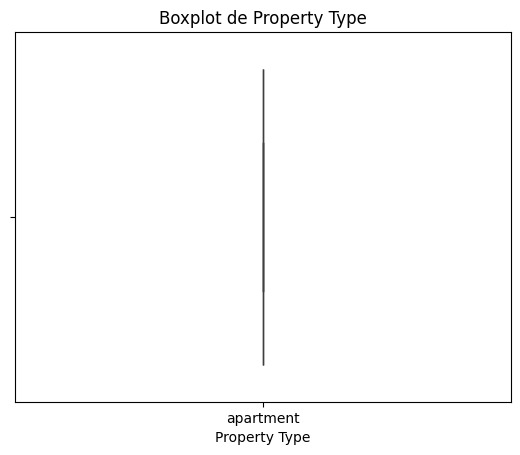

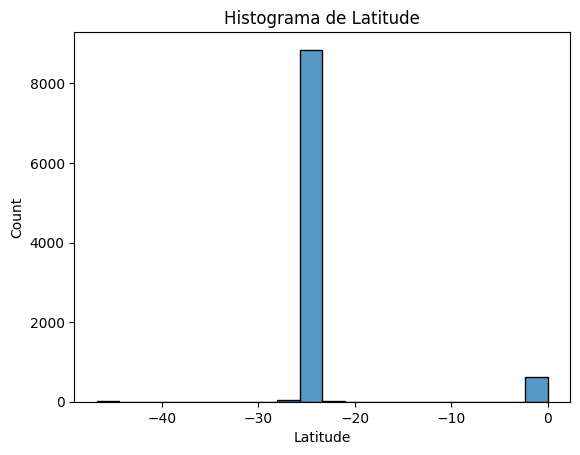

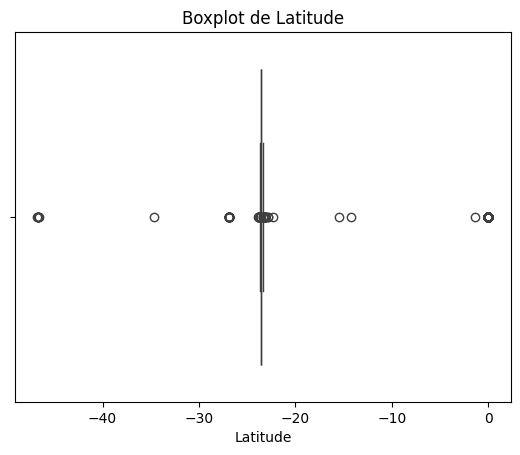

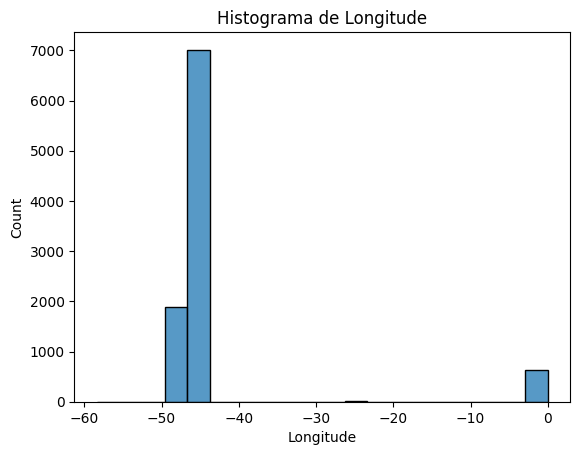

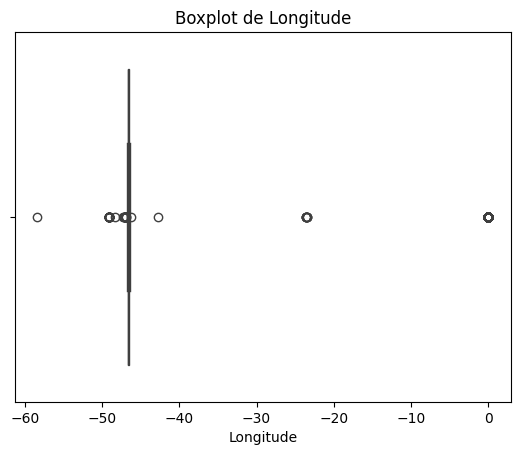

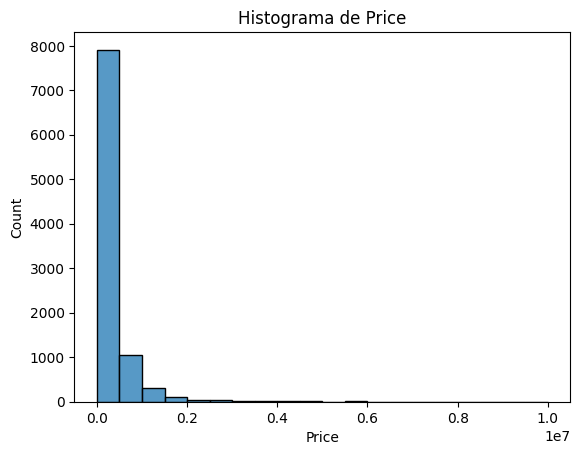

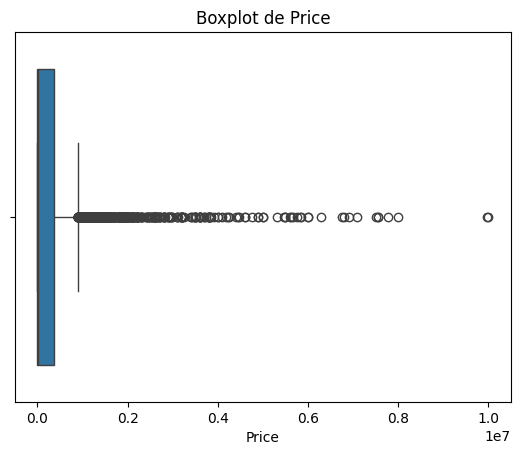

In [40]:
#Distribuição visual dos dados por coluna

for col in df.columns:
    plt.title(f'Histograma de {col}')
    sns.histplot(data=df,x=f'{col}',bins=20)
    plt.show()

    plt.title(f'Boxplot de {col}')
    sns.boxplot(data=df,x=f'{col}')
    plt.show()

## Correlação de variáveis

In [41]:
#Primeiro é necessário transformar as variáveis categóricas em numéricas, portanto será utilizando o LabelEncoder

df_corr = df.copy()

columns = ['District','Negotiation Type','Property Type']

label_encoders = {}

for col in columns:
    label_encoder = LabelEncoder()
    df_corr[col] = label_encoder.fit_transform(df_corr[col])
    label_encoders[col] = label_encoder

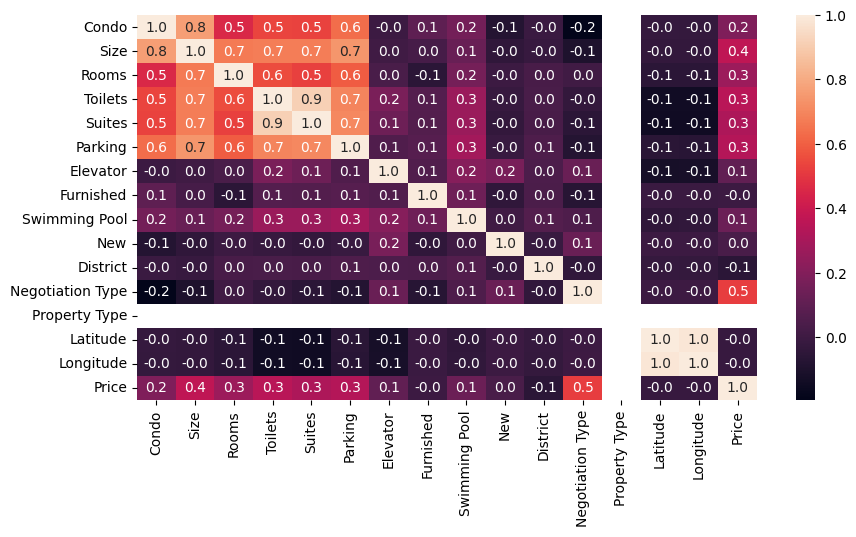

In [42]:
correlacao = df_corr.corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=correlacao,annot=True,fmt='.1f')
plt.show()

## Gráficos que gerem insights para o tratamento de dados e/ou treinamento dos modelos:

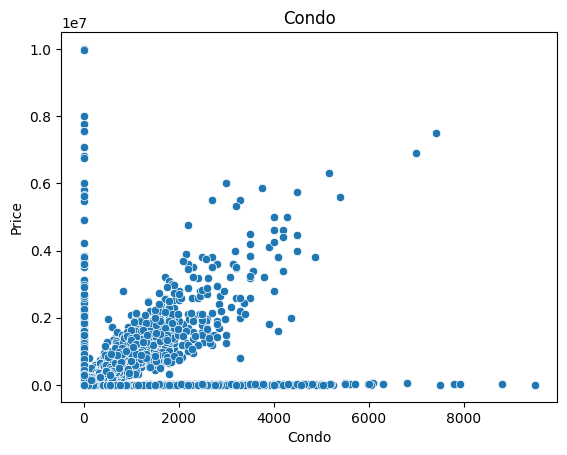

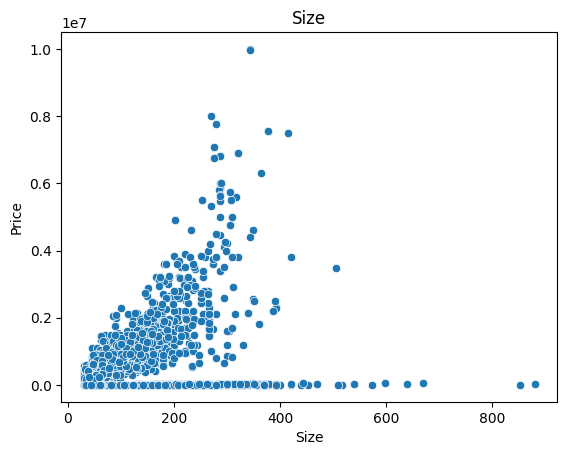

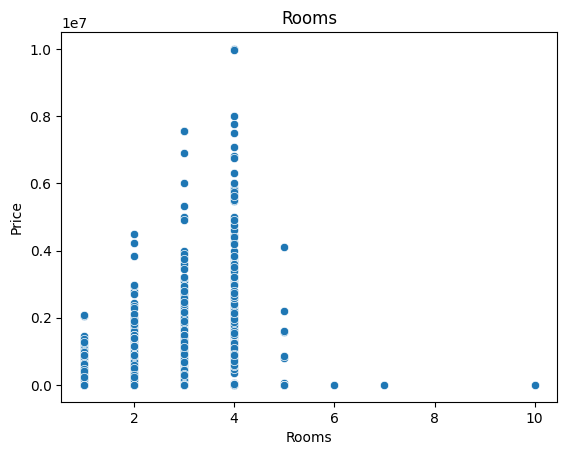

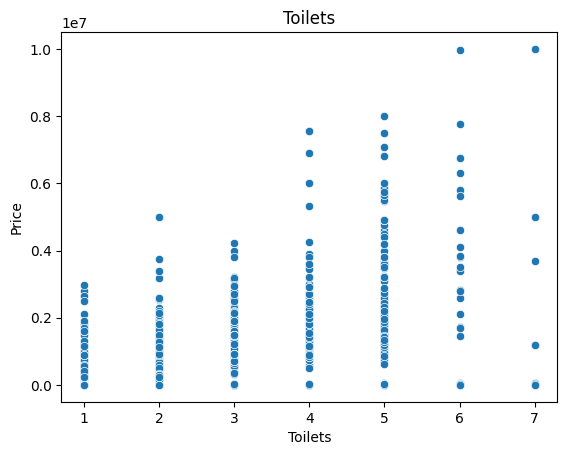

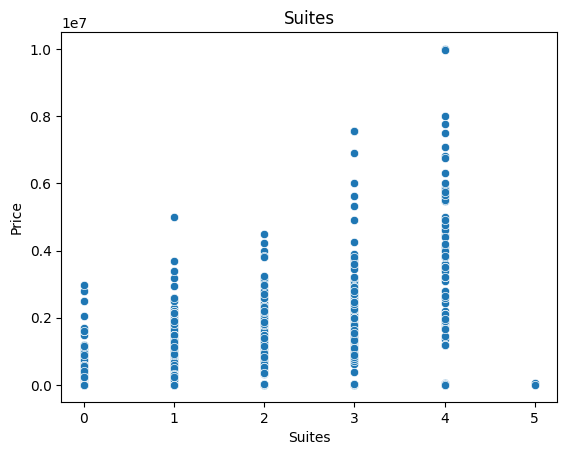

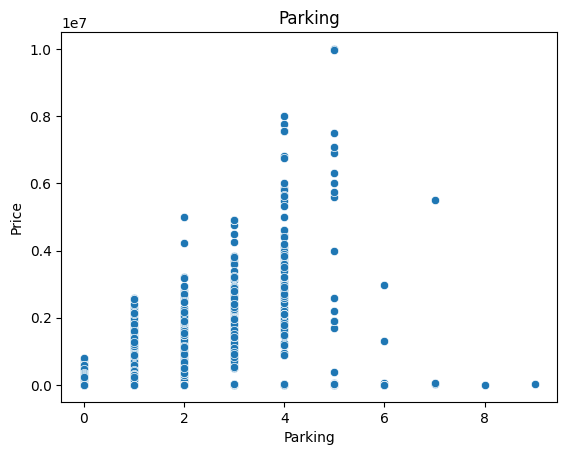

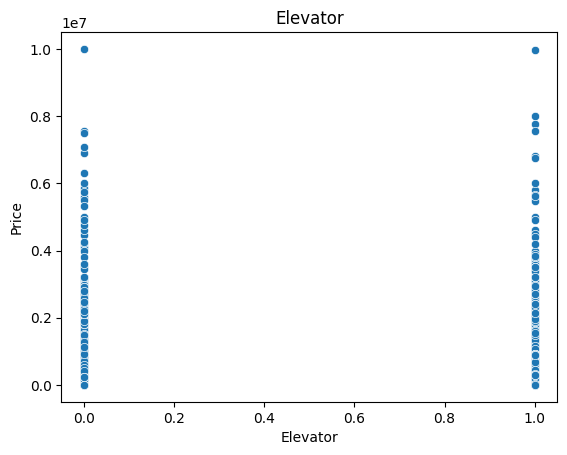

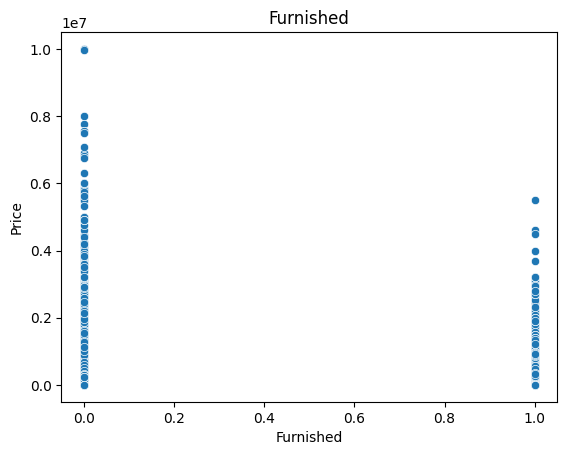

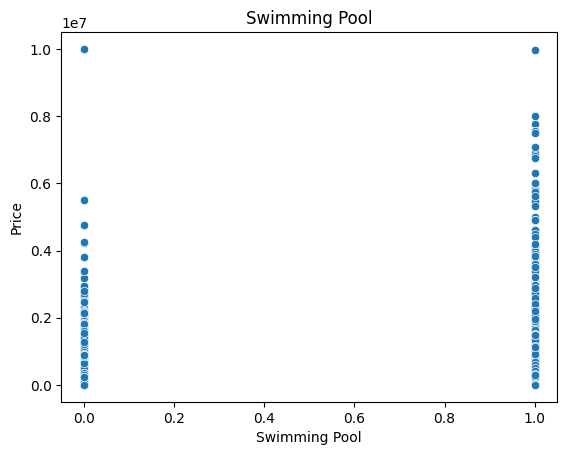

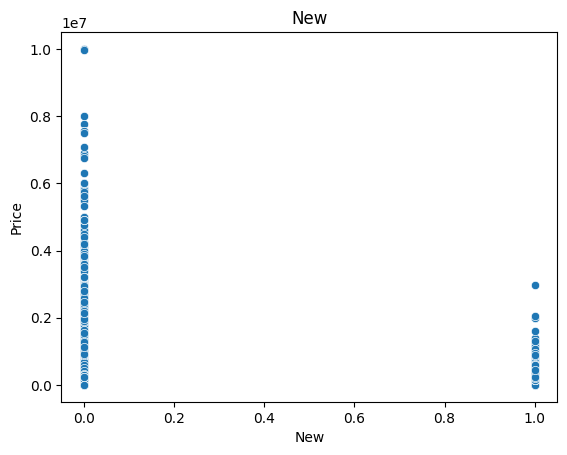

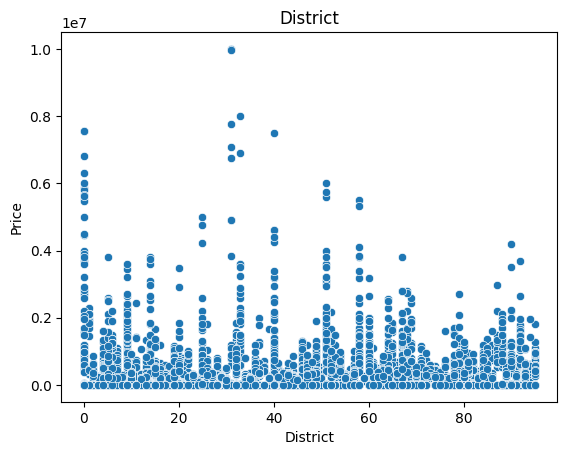

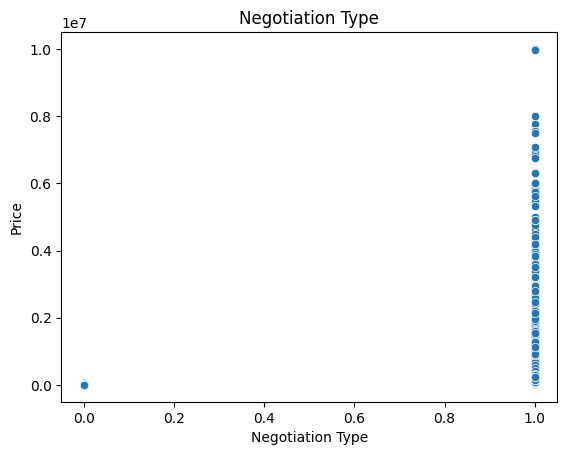

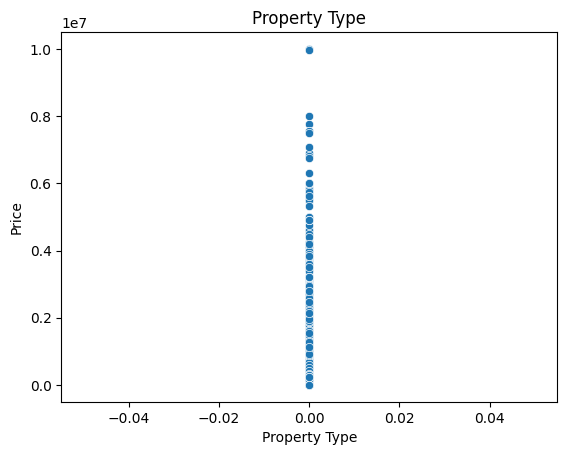

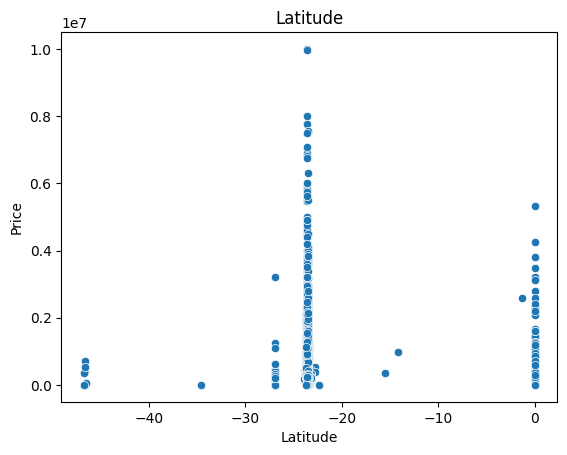

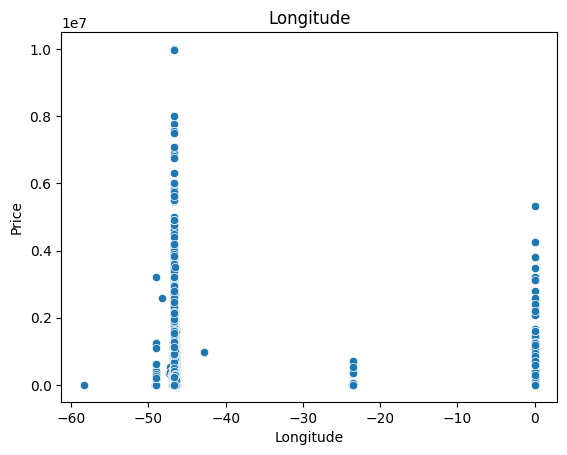

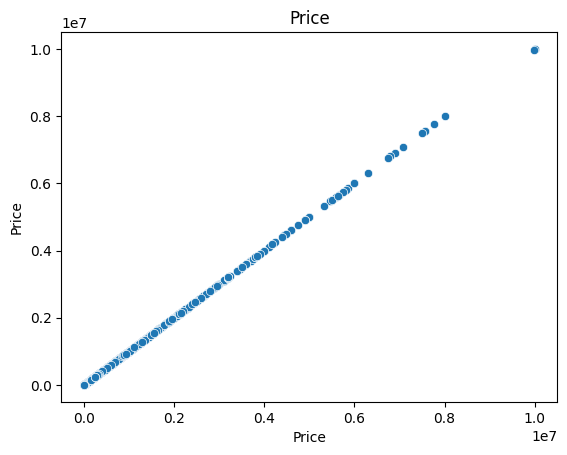

In [43]:
for col in df_corr.columns:
    plt.title(f'{col}')
    sns.scatterplot(data=df_corr,x=f'{col}',y='Price')
    plt.show()

## Discussão dos principais achados da análise exploratória de dados;


- Devido se tratar de dados apenas de São Paulo, a longitude e latitude tendem a conscentra-se. Além de existir dados fora da localidade de SP.
- O único tipo de propriedade é apartamento, portando é irrelevante para o modelo.
- A maioria dos imóveis não são mobiliados.
- O tamanho do apartamento, custo do condomínio, quantidade de quartos, banheiros, suites e estacionamento possuem correlação igual ou superior a moderada.
- Existem apartamento praticamente de graça com valores de condomínio muito elevados.
- Existem apartamentos grandes com preços baixíssimos quando comparados aos seu semelhantes.

# Limpeza e preparação da base de dados

In [44]:
df_clean = df_corr.copy()
df_clean.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Price
6088,670,119,3,4,3,2,0,0,1,0,6,1,0,-23.545925,-46.585984,917000
12828,319,47,1,1,0,1,0,0,1,0,34,1,0,-23.505391,-46.622783,190936
7438,0,83,3,2,1,1,1,0,0,0,69,1,0,-23.660765,-46.706892,619990
6427,400,52,2,2,1,1,0,0,0,0,45,1,0,-23.512865,-46.436892,190000
3002,372,60,2,1,0,1,0,0,1,0,19,0,0,-23.559257,-46.548474,1900


## Remoção de duplicidade


In [45]:
# Removendo linhas duplicadas
df_clean = df_clean.drop_duplicates()
df_clean.shape

(9388, 16)

## Remoção de Outliers

In [46]:
#Tratamento de outliers
def limit_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_sem_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    return df_sem_outliers

In [47]:
# A remoção dos outliers da latitude e longitude, pois existem localidade fora do estado de SP
cols = ['Latitude','Longitude']
for col in cols:
    df_clean = limit_outliers(df_clean,f'{col}')


# Como se trata de apenas do Estado de São Paulo, não há a necessidade da localidade ser muito específica, portanto será utilizado apenas o Distric, portanto:
df_clean = df_clean.drop(columns=['Latitude','Longitude'])

In [48]:
# Investigando apartamento grandes (considerados aqui como >=100m²) com baixo valor
 
df_apto = df_clean.copy()
df_apto = df_apto.loc[(df_apto['Size']>=25)]

df_apto['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    8.304000e+03
mean     3.007558e+05
std      6.043328e+05
min      4.800000e+02
0.5%     7.751500e+02
1%       8.500000e+02
2.5%     1.000000e+03
5%       1.100000e+03
10%      1.300000e+03
20%      1.650000e+03
30%      2.250000e+03
40%      3.500000e+03
50%      8.000000e+03
60%      2.280000e+05
70%      3.200000e+05
80%      4.700000e+05
90%      7.800000e+05
max      1.000000e+07
Name: Price, dtype: float64

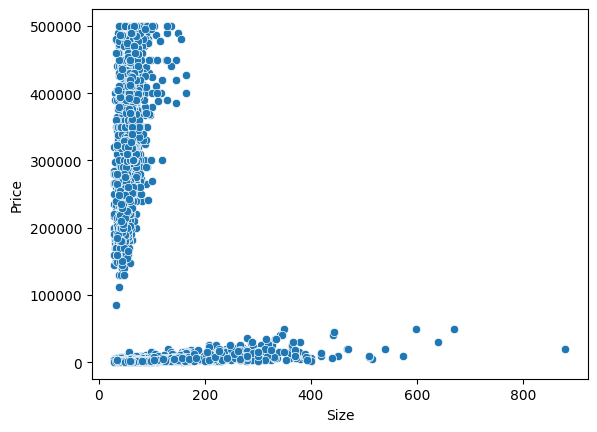

In [49]:
# Verificando os apartamentos grande com preço inferior a 1kk reais
df_apto_view = df_apto.copy()
df_apto_view = df_apto_view.loc[df_apto_view['Price']<=500000]

sns.scatterplot(data=df_apto_view,x='Size',y='Price')
plt.show()

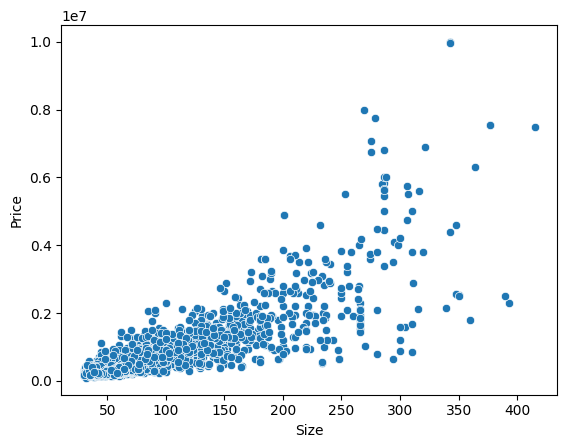

In [50]:
# Os apartamentocom preço inferior a 50Mil reais serão elimnados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[((df_clean['Size']>=0) & (df_clean['Price']<=50000))==False]

sns.scatterplot(data=df_clean,x='Size',y='Price')
plt.show()

In [51]:
# Investigando os apartamentos baratos com alto custo de condomínio (>=R$500)

 
df_condo = df_clean.copy()
df_condo = df_condo.loc[(df_condo['Condo']>=500)]

df_condo['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    1.686000e+03
mean     8.975310e+05
std      7.690517e+05
min      1.500000e+05
0.5%     2.200000e+05
1%       2.500000e+05
2.5%     2.750000e+05
5%       3.000000e+05
10%      3.450000e+05
20%      4.240000e+05
30%      4.975000e+05
40%      5.830000e+05
50%      6.700000e+05
60%      7.600000e+05
70%      9.200000e+05
80%      1.200000e+06
90%      1.646500e+06
max      7.500000e+06
Name: Price, dtype: float64

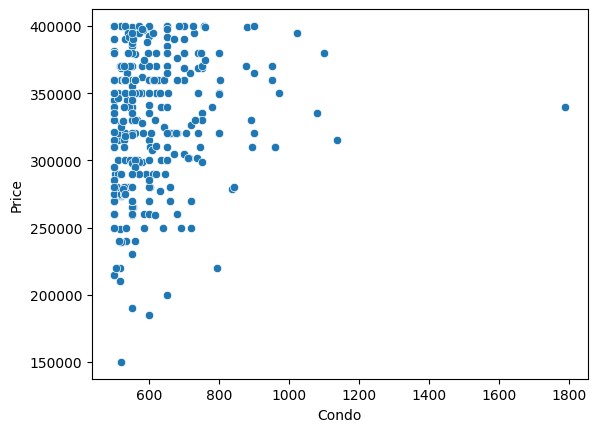

In [52]:
# Verificando os condomínios caros com preço inferior a 400000 reais
df_condo_view = df_condo.copy()
df_condo_view = df_condo_view.loc[df_condo_view['Price']<=400000]

sns.scatterplot(data=df_condo_view,x='Condo',y='Price')
plt.show()

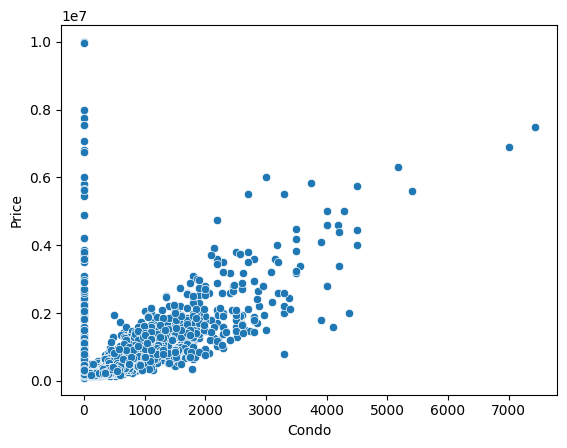

In [53]:
# Os apartamento com preço inferior a 50Mil reais serão elimnados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[((df_clean['Condo']>=0) & (df_clean['Price']<=50000))==False]

sns.scatterplot(data=df_clean,x='Condo',y='Price')
plt.show()

In [54]:
# Quanto mais caro um apartamento é mais provável que haja condomínio, visto o alto valor dos bens. 
# Pessoas com maior poder aquisitivo conseguem pagar por isso, portanto não faz sentido não haver custo do condomínio

# Portanto serão eliminados

# Verificando os apartamentos caros sem condomínio 
df_condo = df_clean.copy()
df_condo = df_condo.loc[(df_condo['Condo']<=500)]

df_condo['Price'].describe(percentiles=[0.005, .01, .025, .05, .10, .20, .30, .40, .50, .60, .70, .80, .90])

count    2.250000e+03
mean     4.465261e+05
std      6.668233e+05
min      8.500000e+04
0.5%     1.454900e+05
1%       1.499490e+05
2.5%     1.619899e+05
5%       1.790000e+05
10%      1.900000e+05
20%      2.197200e+05
30%      2.400000e+05
40%      2.700000e+05
50%      3.000000e+05
60%      3.400000e+05
70%      3.900000e+05
80%      4.754000e+05
90%      6.802100e+05
max      1.000000e+07
Name: Price, dtype: float64

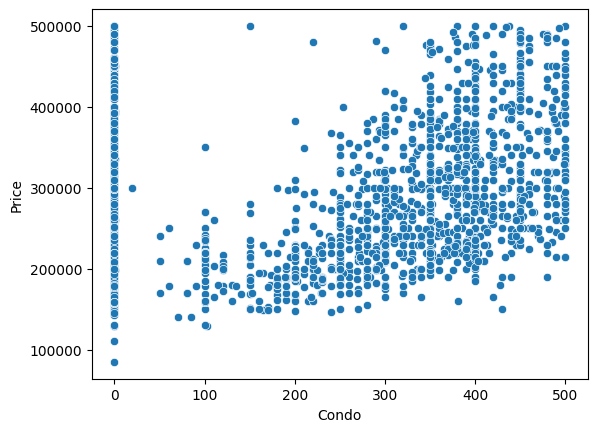

In [55]:
# Verificando os condomínios baratos com preço alto
df_condo_view = df_condo.copy()
df_condo_view = df_condo_view.loc[df_condo_view['Price']<=500000]

sns.scatterplot(data=df_condo_view,x='Condo',y='Price')
plt.show()

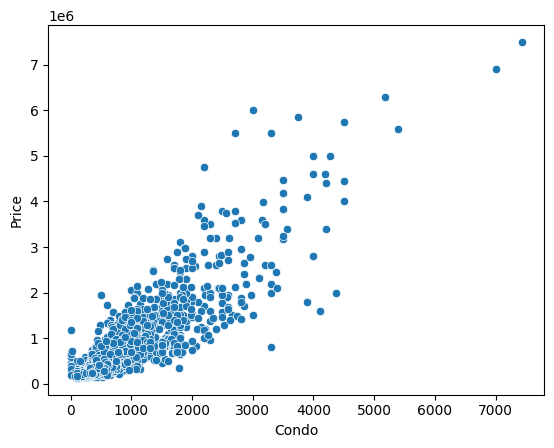

In [56]:
# Os apartamento com condomínio igual a 0 serão eliminados, visto que não faz sentido quando comparados ao demais dados

df_clean = df_clean[df_clean['Condo']>0]

sns.scatterplot(data=df_clean,x='Condo',y='Price')
plt.show()

In [57]:
# A coluna Property Type possui apenas um valor, portanto será excluída

df_clean = df_clean.drop(columns=['Property Type'])


In [58]:
# Realizando Feature Scaling nas colunas com altos valores

columns = ['Condo','Size']

standard_scalers = {}

for col in columns:
    scaler = StandardScaler()
    df_clean[col] = scaler.fit_transform(df_clean[[col]])
    standard_scalers[col] = scaler   

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3076 entries, 6088 to 7270
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Condo             3076 non-null   float64
 1   Size              3076 non-null   float64
 2   Rooms             3076 non-null   int64  
 3   Toilets           3076 non-null   int64  
 4   Suites            3076 non-null   int64  
 5   Parking           3076 non-null   int64  
 6   Elevator          3076 non-null   int64  
 7   Furnished         3076 non-null   int64  
 8   Swimming Pool     3076 non-null   int64  
 9   New               3076 non-null   int64  
 10  District          3076 non-null   int32  
 11  Negotiation Type  3076 non-null   int32  
 12  Price             3076 non-null   int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 312.4 KB


# Treinamento e Validação de modelos de regressão

In [60]:
#Realizando a cópia de df_clena para a próxima etapa
df_model = df_clean.copy()

In [61]:
# Dividindo a base em treino e validação
X = df_model.drop(columns=['Price']) 
y = df_model['Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


### Random Forest

In [62]:
# Treinamento e Cross-Validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

model_rf = RandomForestClassifier(random_state=42)

pontuacoes = cross_val_score(model_rf, X_train, y_train, cv=kf)

for i, pontuacao in enumerate(pontuacoes):
    print(f'Fold {i + 1}: {pontuacao:.2f}')

media_pontuacoes = pontuacoes.mean()
print(f'Média das pontuações: {media_pontuacoes:.2f}')


model_rf.fit(X_train, y_train)
y_pred_model_rf = model_rf.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_model_rf)
print(f'MSE: {mse_rf}')

Fold 1: 0.02
Fold 2: 0.02
Fold 3: 0.03
Fold 4: 0.05
Fold 5: 0.04
Média das pontuações: 0.03
MSE: 110386716743.36078


### Linear Regression

In [63]:
# Treinamento e Cross-Validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

model_linear = LinearRegression()

pontuacoes = cross_val_score(model_linear, X_train, y_train, cv=kf)

for i, pontuacao in enumerate(pontuacoes):
    print(f'Fold {i + 1}: {pontuacao:.2f}')

media_pontuacoes = pontuacoes.mean()
print(f'Média das pontuações: {media_pontuacoes:.2f}')


model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_val)

mse_linear = mean_squared_error(y_val, y_pred_linear)
print(f'MSE: {mse_linear}')

Fold 1: 0.86
Fold 2: 0.82
Fold 3: 0.84
Fold 4: 0.81
Fold 5: 0.83
Média das pontuações: 0.83
MSE: 62483796505.39783


### Naive Bayes

In [64]:
# Treinamento e Cross-Validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

model_nb = GaussianNB()

pontuacoes = cross_val_score(model_nb, X_train, y_train, cv=kf)

for i, pontuacao in enumerate(pontuacoes):
    print(f'Fold {i + 1}: {pontuacao:.2f}')

media_pontuacoes = pontuacoes.mean()
print(f'Média das pontuações: {media_pontuacoes:.2f}')

model_nb.fit(X_train, y_train)
y_pred_model_nb = model_nb.predict(X_val)

mse_nb = mean_squared_error(y_val, y_pred_model_nb)
print(f'MSE: {mse_nb}')

Fold 1: 0.00
Fold 2: 0.01
Fold 3: 0.01
Fold 4: 0.00
Fold 5: 0.01
Média das pontuações: 0.01
MSE: 137550763863.46805


### Discussão dos Resultados da Validação

- O melhor modelo foi o de Linear Regression, visto o menor valor de Erro Quadrado médio.
- Através do cross-validation é possível observar que os modelos tivessem underfiting.
####

### Avaliação do Conjunto de Teste

##### Adicionando colunas a uma escala e transformando categorias

In [65]:
# Realizando Feature Scaling nas colunas com altos valores
columns = ['Condo','Size']

for col in columns:
    X_test[col] = standard_scalers[col].transform(X_test[col].values.reshape(-1, 1))


#Primeiro é necessário transformar as variáveis categóricas em numéricas, portanto será utilizando o LabelEncoder
columns = ['District','Negotiation Type','Property Type']

for col in columns:
    X_test[col] = label_encoders[col].transform(X_test[col])

#Dropando colunas
X_test = X_test.drop(columns=['Property Type','Latitude','Longitude'])

c:\Users\User\OneDrive\Documentos\saopaulo_sale_rent\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\OneDrive\Documentos\saopaulo_sale_rent\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##### Random Forest

In [66]:
y_pred_model_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_model_rf)
mse_rf

691483409893.3071

##### Linear Regression

In [67]:
y_pred_linear = model_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear

727076313109.4994

##### Naive Bayes

In [68]:
y_pred_model_nb = model_nb.predict(X_test)

mse_nb = mean_squared_error(y_test, y_pred_model_nb)
mse_nb

616931597720.902

### Discussão dos resultados dos testes


- Com o conjunto de teste Naive Bayes se saiu melhor
- Naive Bayes obteve o menor valor de MSE com os dados de teste

#### 

### Trabalhos Futuros


- Avaliar alternativa à exclusão dos outliers, como substituir pela mediana ou moda.
- Explorar melhor os hiperparâmetros da regressão linear.
- Aplicar o RobustScaler ao invés de StandardScaler e avaliar a infleuncia dos outliers.
- Criar novas features a partir das ja existentes.